#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the file

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### ML modeling
<pre>
1) Data Preprocessing
a) Handle Null Values
b) Handle Duplicates
c) Handle Inconsistent data
d) Change data types
e) Handling Outliers

2) Data Transformation
a) Scaling
b) Encoding

3) Model Building
a) Select x and y
b) Split data into train and test
c) Execute different ML models.
d) Evalute the perfoemance of the model
e) Identify the best model
f) Save the model
</pre>

#### Data Preporcessing

In [7]:
df.shape  # rows = 1338, cols = 7

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Check Nulll Values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Check Duplicates

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

#### Check data types

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Check Inconsistent data

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### EDA

In [13]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


#### Catgeorical Data

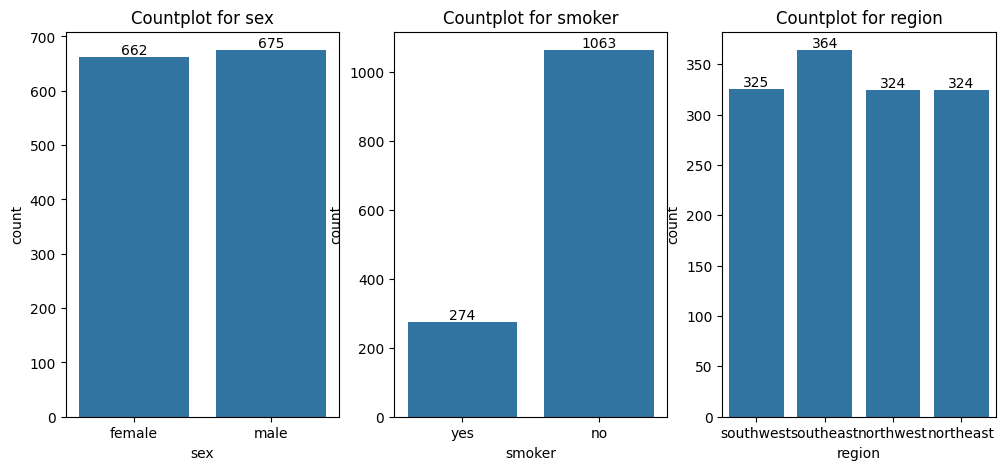

In [14]:
plt.figure(figsize=(12,5))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x = df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
    
plt.show()

#### Numerical Data

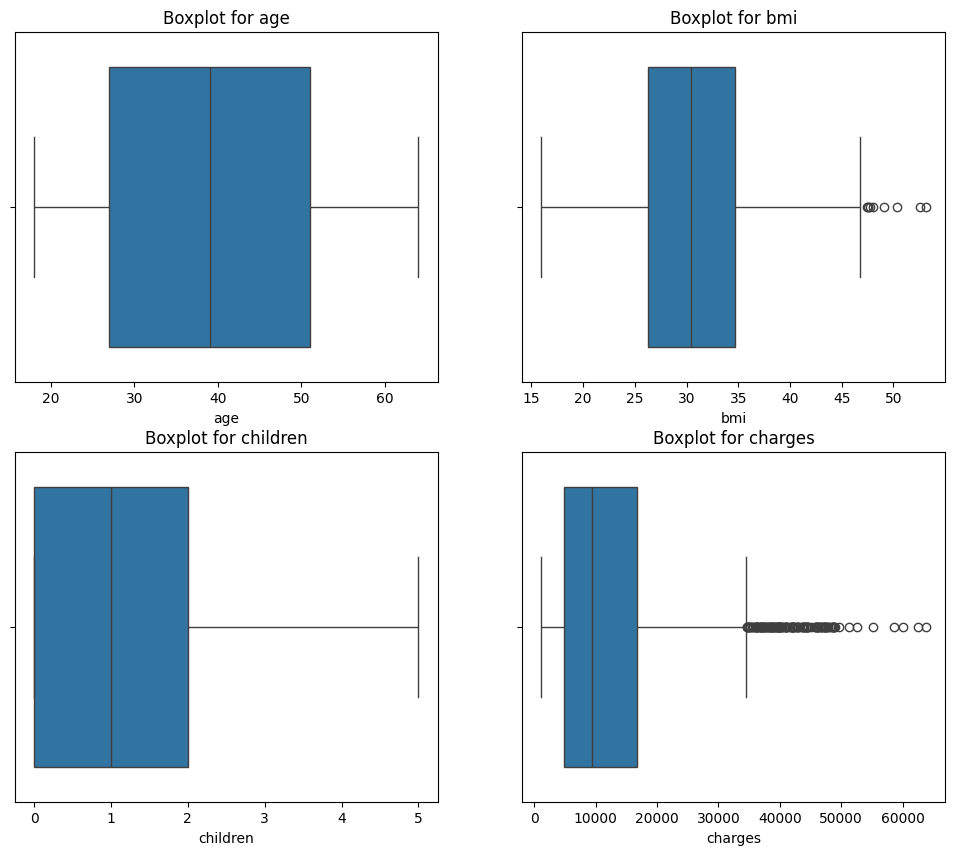

In [15]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

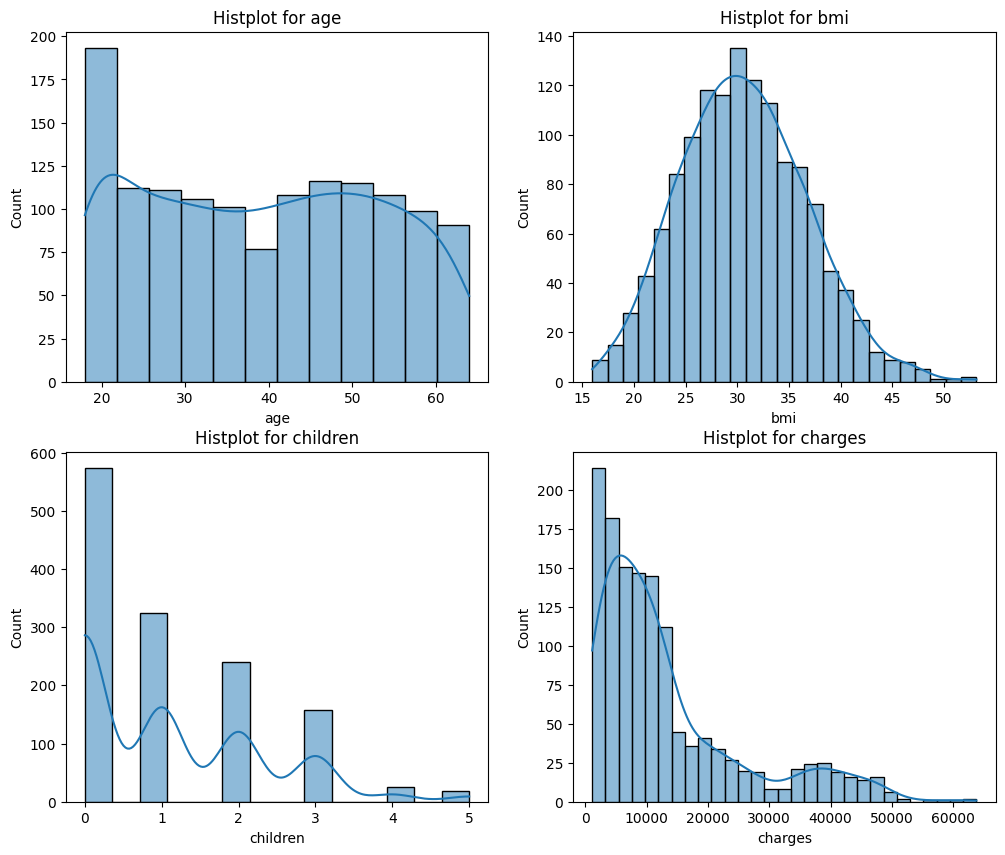

In [16]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(x = df[num_cols[i]],kde=True)
    plt.title(f'Histplot for {num_cols[i]}')

plt.show()

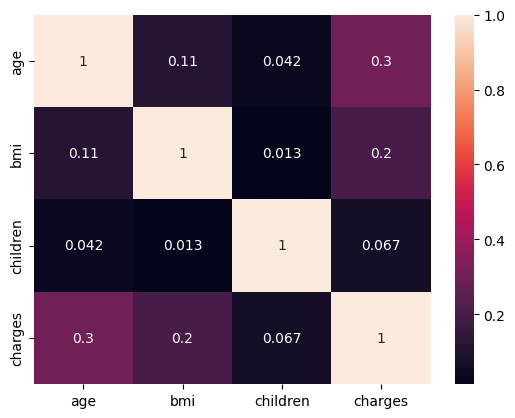

In [17]:
corr = df[num_cols].corr()

sns.heatmap(corr,annot=True)
plt.show()

#### Outlier Treatment - Cap

In [18]:
a = df[num_cols].describe(percentiles=[0.01,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,50%,95%,97%,98%,99%,max
age,18.0000,18.00000,39.0000,62.0000,63.000000,63.000000,64.000000,64.00000
bmi,15.9600,17.89420,30.4000,41.1080,42.455200,43.920800,46.411200,53.13000
children,0.0000,0.00000,1.0000,3.0000,4.000000,4.000000,5.000000,5.00000
charges,1121.8739,1252.95744,9386.1613,41210.0498,44495.190584,46677.324238,48537.796878,63770.42801


#### Outliers Detection

In [19]:
print(df[df['bmi']>46.411].shape)
print(df[df['charges']>46677.324238].shape)

(14, 7)
(27, 7)


#### Handle the Outliers

In [21]:
df1 = df.copy()

In [22]:
df['bmi'] = np.where(df['bmi']>46.411 , 46.411,df['bmi'])
df['charges'] = np.where(df['charges']>46677.324238 , 46677.324238,df['charges'])

In [23]:
a1 = df[num_cols].describe(percentiles=[0.01,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,50%,95%,97%,98%,99%,max
age,18.0000,18.00000,39.0000,62.0000,63.000000,63.000000,64.000000,64.000000
bmi,15.9600,17.89420,30.4000,41.1080,42.455200,43.920800,46.335040,46.411000
children,0.0000,0.00000,1.0000,3.0000,4.000000,4.000000,5.000000,5.000000
charges,1121.8739,1252.95744,9386.1613,41210.0498,44495.190584,46665.889315,46677.324238,46677.324238


#### Encode the Catgeorical Features

In [24]:
print(cat_cols)

Index(['sex', 'smoker', 'region'], dtype='object')


In [25]:
for i in cat_cols:
    print(i,df[i].unique(),df[i].nunique())

sex ['female' 'male'] 2
smoker ['yes' 'no'] 2
region ['southwest' 'southeast' 'northwest' 'northeast'] 4


In [26]:
df['sex'] = df['sex'].replace({'male':1,'female':0})
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})

In [27]:
for i in cat_cols:
    print(i,df[i].unique(),df[i].nunique())

sex [0 1] 2
smoker [1 0] 2
region ['southwest' 'southeast' 'northwest' 'northeast'] 4


In [28]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [34]:
lb = LabelEncoder()
df['region'] = lb.fit_transform(df['region'])

In [35]:
df['region'].value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

#### Select x and y

In [36]:
x = df.drop('charges',axis=1)
y = df['charges']
print(x.shape)
print(y.shape)

(1337, 6)
(1337,)


#### Split the data into train and test

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
print(x.shape)
print(0.30*1337)
print(0.70*1337)

(1337, 6)
401.09999999999997
935.9


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(935, 6)
(402, 6)
(935,)
(402,)


#### Create Function to Evaluate the Model

In [40]:
from sklearn.metrics import *

In [41]:
# R2_Score = 1 - sse/sst

In [42]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 =  model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res_df = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,
                          'Test_MAE':test_mae,'Test_MSE':test_mse,
                          'Test_RMSE':test_rmse},index=[mname])
    return res_df

#### Import ML models

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### 1) Linear Regression

In [44]:
lr1 = LinearRegression()

lr1_res = eval_model(lr1,'Linear_Reg')
lr1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Linear_Reg,0.739004,0.788976,4016.818123,3.323532e+07,5765.008077


#### 2) Decision Tree Reg

In [46]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=12)  # random_state

dt1_res = eval_model(dt1,'DTree_Reg')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DTree_Reg,0.905503,0.84967,2581.496331,2.367626e+07,4865.825472


#### 3) Random Forest Regression

In [49]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=8,
                            min_samples_split=12)

rf1_res = eval_model(rf1,'RandomForest_Reg')
rf1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RandomForest_Reg,0.910033,0.881311,2439.465322,1.869304e+07,4323.544507


In [50]:
all_res = pd.concat([lr1_res,dt1_res,rf1_res])
all_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Linear_Reg,0.739004,0.788976,4016.818123,3.323532e+07,5765.008077
DTree_Reg,0.905503,0.849670,2581.496331,2.367626e+07,4865.825472
RandomForest_Reg,0.910033,0.881311,2439.465322,1.869304e+07,4323.544507


#### Save the Model

In [51]:
# Serialization
import pickle

#### Serialization

In [52]:
pickle.dump(lr1,open('lr1.pkl','wb'))
pickle.dump(dt1,open('dt1.pkl','wb'))
pickle.dump(rf1,open('rf1.pkl','wb'))

#### Deserialization

In [53]:
rf_model = pickle.load(open('rf1.pkl','rb'))